# CLASSIFIER COMPARISON FOR SPACE OBJECTS

Student Name : Sai Aparna Avva

redId: 826027625

Student Name : Sheetal Rani Prasad

redId: 825861940


This project attempted to use multiple classification algorithms to identify space objects such as stars, galaxies, and quasars based on their spectroscopic (redshift or spectral type) and photometric (flux or size, brightness) properties, and to select the best performing among them. The dataset is obtained from Sloan Digital Sky Survey. The data set consists of 22 columns and 500000 rows with non-missing values. It is having three unique values in the target column: Galaxy, Star, and Quasar. To construct a well-working classification model, 11 features were identified as critical which are redshift, flux density and other features related to electromagnetic spectrum colour indexes.

Algorithms used:
1.	Logistic Regression
2.	Gaussian Naïve Bayes
3.	Bernoulli Naïve Bayes
4.	Linear SVC
5.	Decision Tree
6.	KNN Classifier
7.	Bagging Classifier
8.	Random Forest Classifier
9.	AdaBoost Classifier
10.	Gradient Boosting Classifier

Dataset available under folder 'data/' on Github: https://github.com/sheetalrprasad/CS649_Project

Feature Description

1. objid- A unique number identifying an object in the image catalog used by the CAS. It is a bit-encoded integer of run, rerun, camcol, field, object.
RA (right ascension) and DEC (declination) are to the sky what longitude and latitude are to the surface of the Earth. RA corresponds to east/west direction (like longitude), while Dec measures north/south directions, like latitude.
2. dec - declination
3. ra	- right ascension9
4. Redshift - the wavelength of the light is stretched, so the light is seen as 'shifted' towards the red part of the spectrum
5. u -  Ultraviolet-band 
6. z -  Z-band 
7. g -  Green-band
8. r -  Red-band 
9. i -  Infrared-band 	
10. run- number, which identifies the specific scan
11. camcol- a number from 1 to 6, identifying the scanline within the run
12. rerun - A reprocessing of an imaging run. The underlying imaging data are the same, but the software version and/or calibration are different.
13. field - a field is a location on the sky, defined by central coordinates and a radius.
14. specobjid- A unique bit-encoded 64-bit ID used for optical spectroscopic objects.
15. class - classification of the object (Galaxy/Sky/Quasar)
16. Plate - Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS. In APOGEE data in DR10 and later, note that while "plate" is commonly used interchangeably with Design, multiple plates may exist for the same design (i.e. for the same set of stars). For example, two plates may have identical targets but be drilled for observations at different hour angles, temperatures, or epochs, thereby making them unique plates with different Plate IDs.
17. mjd- Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.
18. fiberid - The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.
19. modelFlux_z- Magnitude in 3 arcsec diameter fiber radius for Z-band
20. modelFlux_r - Magnitude in 3 arcsec diameter fiber radius for R-band
21. modelFlux_u	- Magnitude in 3 arcsec diameter fiber radius for U-band	
22. modelFlux_g	- Magnitude in 3 arcsec diameter fiber radius for G-band
23. modelFlux_i - Magnitude in 3 arcsec diameter fiber radius for I-band

Note: LinearSVC, Stochastic Gradient Boosting models take 5 to 8 minutes time to run

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

## Cleaning

In [39]:
filePath = 'C:/Users/asus/CS649_SkyObjectProject/data/Skyserver_SQL4_7_2022 12_58_52 AM.csv'

In [40]:
spaceObj = pd.read_csv(filePath,skiprows=1, index_col='objid')
spaceObj = spaceObj.sort_index()

In [41]:
spaceObj.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,...,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,specobjid,class,redshift,plate,mjd,fiberid
objid,,,,,,,,,,,,,,,,,,,,,
1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,6,...,50.35183,92.27589,130.8493,172.3348,430194949951088640,GALAXY,0.032125,382,51816,368
1237645879578460255,51.443695,1.270073,19.52808,17.96541,17.03493,16.53754,16.14154,94,301,6,...,65.13789,153.47130,242.6524,349.4461,466235292731336704,GALAXY,0.121315,414,51869,410
1237645879578460271,51.483584,1.272013,18.72268,17.38520,16.81134,16.51803,16.29502,94,301,6,...,111.15240,188.56690,247.0515,303.3817,466232818830174208,GALAXY,0.048765,414,51869,401
1237645941291614227,49.627485,-1.041769,17.65612,16.17133,15.58940,15.37850,15.26744,109,301,1,...,339.99300,581.08730,705.6645,781.6734,1705795582662043648,STAR,-0.000098,1515,52932,208
1237645941824356443,40.285690,-0.714957,17.54884,15.75164,15.03100,14.66728,14.36099,109,301,2,...,500.42900,971.85570,1358.5900,1801.3750,459394680333821952,GALAXY,0.040287,408,51821,100


In [42]:
spaceObj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 1237645879551066262 to 1237666339725967482
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ra           500000 non-null  float64
 1   dec          500000 non-null  float64
 2   u            500000 non-null  float64
 3   g            500000 non-null  float64
 4   r            500000 non-null  float64
 5   i            500000 non-null  float64
 6   z            500000 non-null  float64
 7   run          500000 non-null  int64  
 8   rerun        500000 non-null  int64  
 9   camcol       500000 non-null  int64  
 10  field        500000 non-null  int64  
 11  modelFlux_u  500000 non-null  float64
 12  modelFlux_g  500000 non-null  float64
 13  modelFlux_r  500000 non-null  float64
 14  modelFlux_i  500000 non-null  float64
 15  modelFlux_z  500000 non-null  float64
 16  specobjid    500000 non-null  uint64 
 17  class        500000 non-null  object

In [43]:
spaceObj.isna().any()

ra             False
dec            False
u              False
g              False
r              False
i              False
z              False
run            False
rerun          False
camcol         False
field          False
modelFlux_u    False
modelFlux_g    False
modelFlux_r    False
modelFlux_i    False
modelFlux_z    False
specobjid      False
class          False
redshift       False
plate          False
mjd            False
fiberid        False
dtype: bool

In [44]:
#taking only required columns
spaceObjData = spaceObj[['ra','dec','u','g','r','i','z','run', 'rerun', 'camcol', 'field','modelFlux_u','modelFlux_g','modelFlux_r','modelFlux_i','modelFlux_z','redshift','plate','mjd','class']]

In [45]:
spaceObjData.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,redshift,plate,mjd
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,500000.000000,5.000000e+05,5.000000e+05,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000
mean,184.883287,26.993610,18.642071,17.416536,16.891576,16.593550,16.394705,3161.838304,301.0,3.493276,190.036564,6.199533e+01,2.094030e+02,376.448931,494.529395,5.710905e+02,0.172462,2227.048788,53623.901124
std,69.327689,20.892019,0.829097,0.984960,1.132459,20.067806,28.357076,1090.979194,0.0,1.593426,140.958690,2.994205e+03,1.964296e+03,2730.868538,3682.424859,5.086611e+03,0.433437,2054.014340,1477.028289
min,0.002795,-11.252825,6.752484,7.466997,8.449127,-9999.000000,-9999.000000,94.000000,301.0,1.000000,11.000000,1.445304e+01,1.003563e+01,-276.905600,-281.977100,-1.194468e+03,-0.004268,266.000000,51578.000000
25%,146.617060,7.229103,18.224177,16.863850,16.209238,15.878837,15.636038,2305.000000,301.0,2.000000,85.000000,1.956745e+01,5.968242e+01,92.424260,116.000875,1.287235e+02,0.000037,954.000000,52577.000000
50%,186.532990,29.631464,18.873805,17.531045,16.916115,16.620505,16.445845,3530.000000,301.0,4.000000,156.000000,2.821418e+01,9.718120e+01,171.219350,224.797150,2.640263e+02,0.051079,1676.000000,53228.000000
75%,225.418842,43.801855,19.271110,18.060380,17.585532,17.338830,17.225795,3927.000000,301.0,5.000000,254.000000,5.132453e+01,1.796632e+02,328.326525,445.105000,5.566213e+02,0.097835,2558.000000,54509.000000
max,359.998882,79.742295,19.600000,19.996050,33.209920,32.349170,30.846780,4858.000000,301.0,6.000000,831.000000,1.990702e+06,1.030864e+06,417204.700000,869349.300000,2.545457e+06,7.011245,11704.000000,58543.000000


In [46]:
# Drop dublicated features
spaceObjData.drop_duplicates(inplace=True)

D:\Anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


## Visualization

In [47]:
spaceObjData['class'].value_counts()

GALAXY    270432
STAR      176386
QSO        53182
Name: class, dtype: int64

In [48]:
targetCount = spaceObjData['class'].value_counts()

In [49]:
print(f'Class 0: {targetCount[0]}')
print(f'Class 1: {targetCount[1]}')
print(f'Class 2: {targetCount[2]}')
print(f'Percentage of Majority Class: {round(targetCount[0] / sum(targetCount), 4)*100}')
print(f'Percentage of Minority Class: {round(targetCount[2] / sum(targetCount), 4)*100}')

Class 0: 270432
Class 1: 176386
Class 2: 53182
Percentage of Majority Class: 54.09
Percentage of Minority Class: 10.639999999999999


<AxesSubplot:xlabel='class', ylabel='count'>

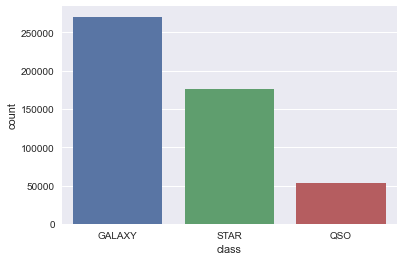

In [50]:
sns.countplot(x=spaceObjData['class'],label="Count")

In [51]:
#creating column redshift_class based on redshift column
spaceObjData['redshift_class'] = spaceObjData['redshift'].apply(lambda x: True if x>=0 else False)

C:\Users\asus\AppData\Local\Temp/ipykernel_29072/1461706710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceObjData['redshift_class'] = spaceObjData['redshift'].apply(lambda x: True if x>=0 else False)


In [52]:
#count of grouped redshift_class and class 
spaceObjData.groupby(['class', 'redshift_class']).redshift.agg(['count'])

count
class  redshift_class        
GALAXY False              138
       True            270294
QSO    True             53182
STAR   False           113045
       True             63341

<AxesSubplot:xlabel='class,redshift_class'>

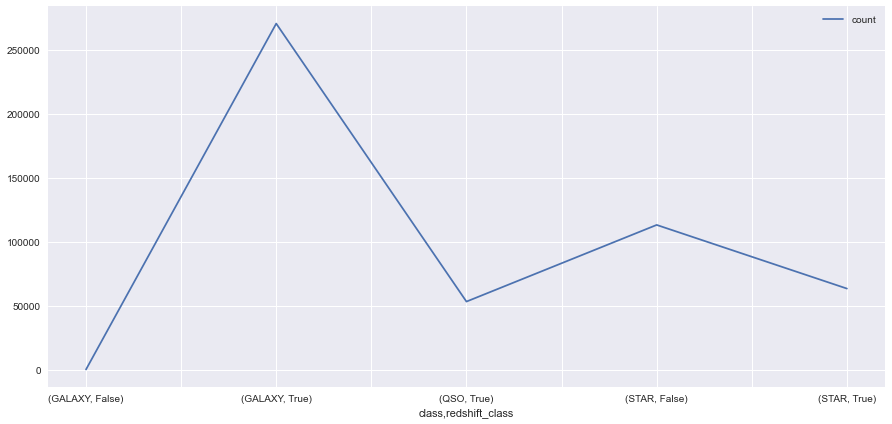

In [53]:
fig, ax = plt.subplots(figsize=(15,7))
spaceObjData.groupby(['class', 'redshift_class']).redshift.agg(['count']).plot(ax=ax)
# True=>redshift & False=>blueshift

<AxesSubplot:xlabel='ra', ylabel='dec'>

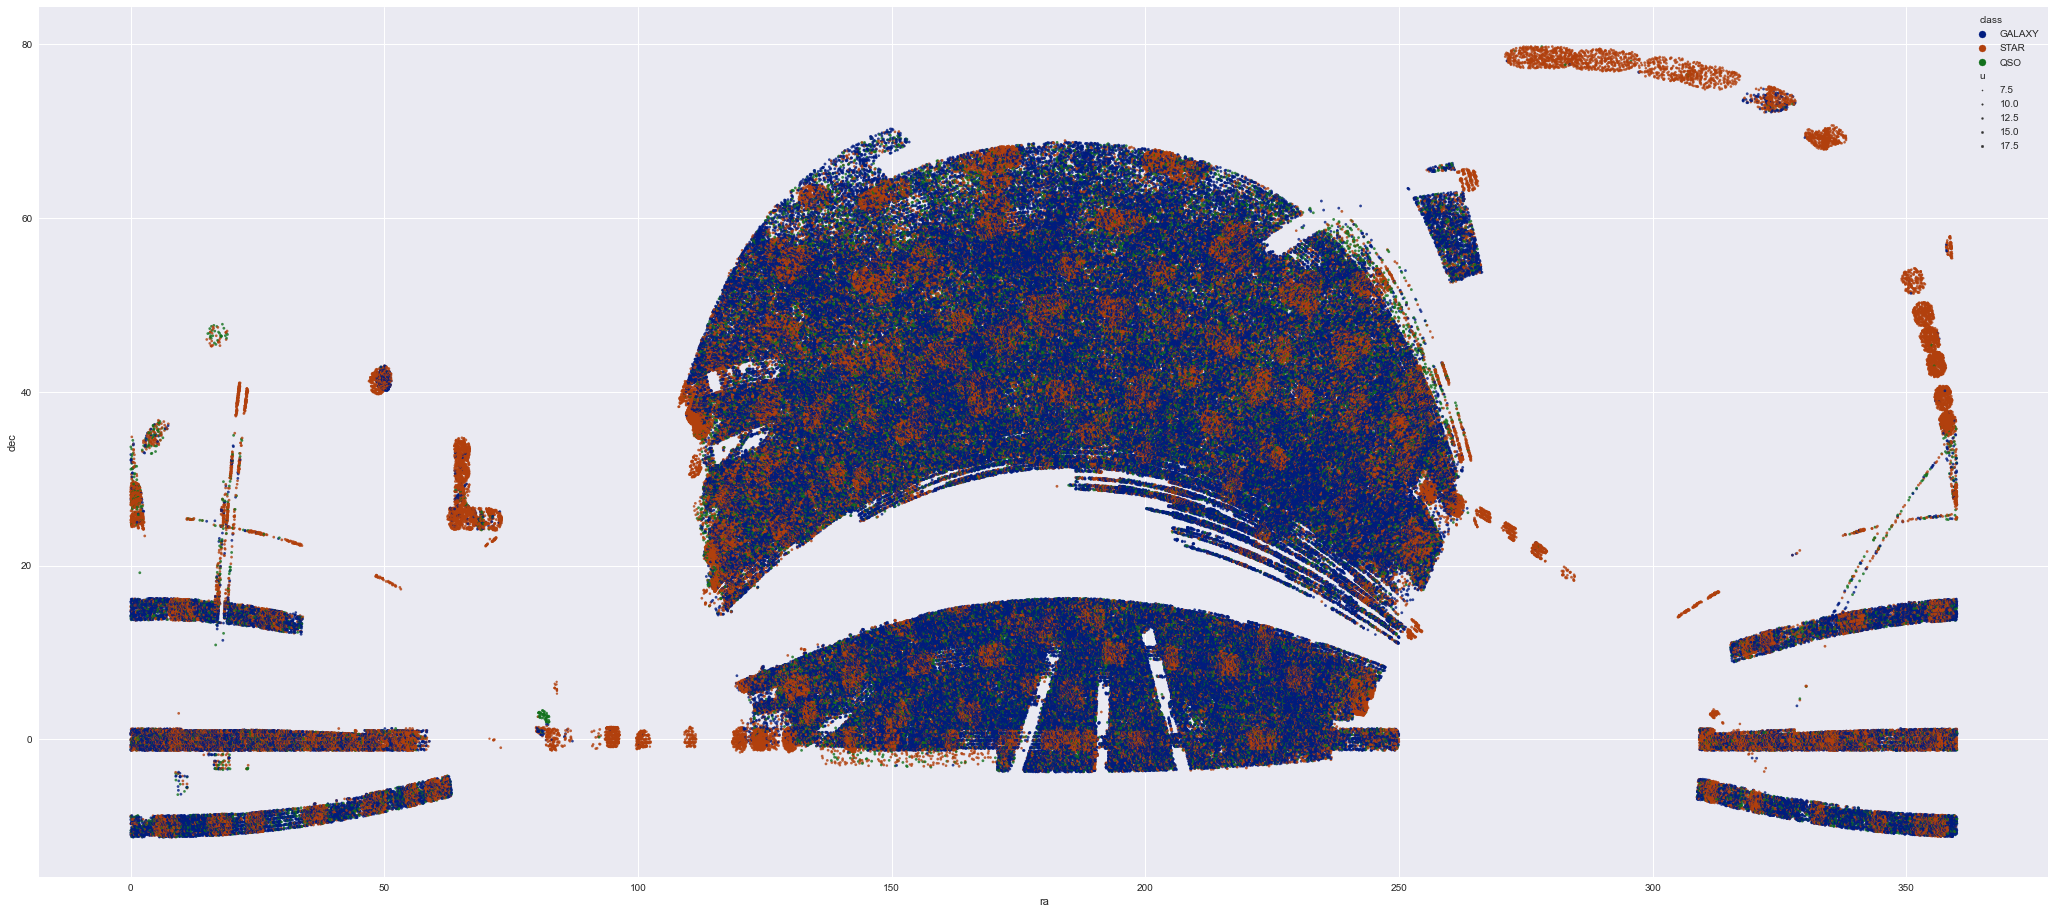

In [54]:
# distribution of astronomical objects via dec & ra
plt.figure(figsize=(36, 16))
sns.scatterplot(x="ra", y="dec",
                hue="class", alpha=0.8, size="u",
                palette='dark', 
                sizes=(1, 8), linewidth=0,
                data=spaceObjData)

In [55]:
#creating random sample data to plot pairplots to show the marginal and joint distributions of the features
sampleData = spaceObjData.sample(int(len(spaceObjData)*0.001))

<Figure size 1080x504 with 0 Axes>

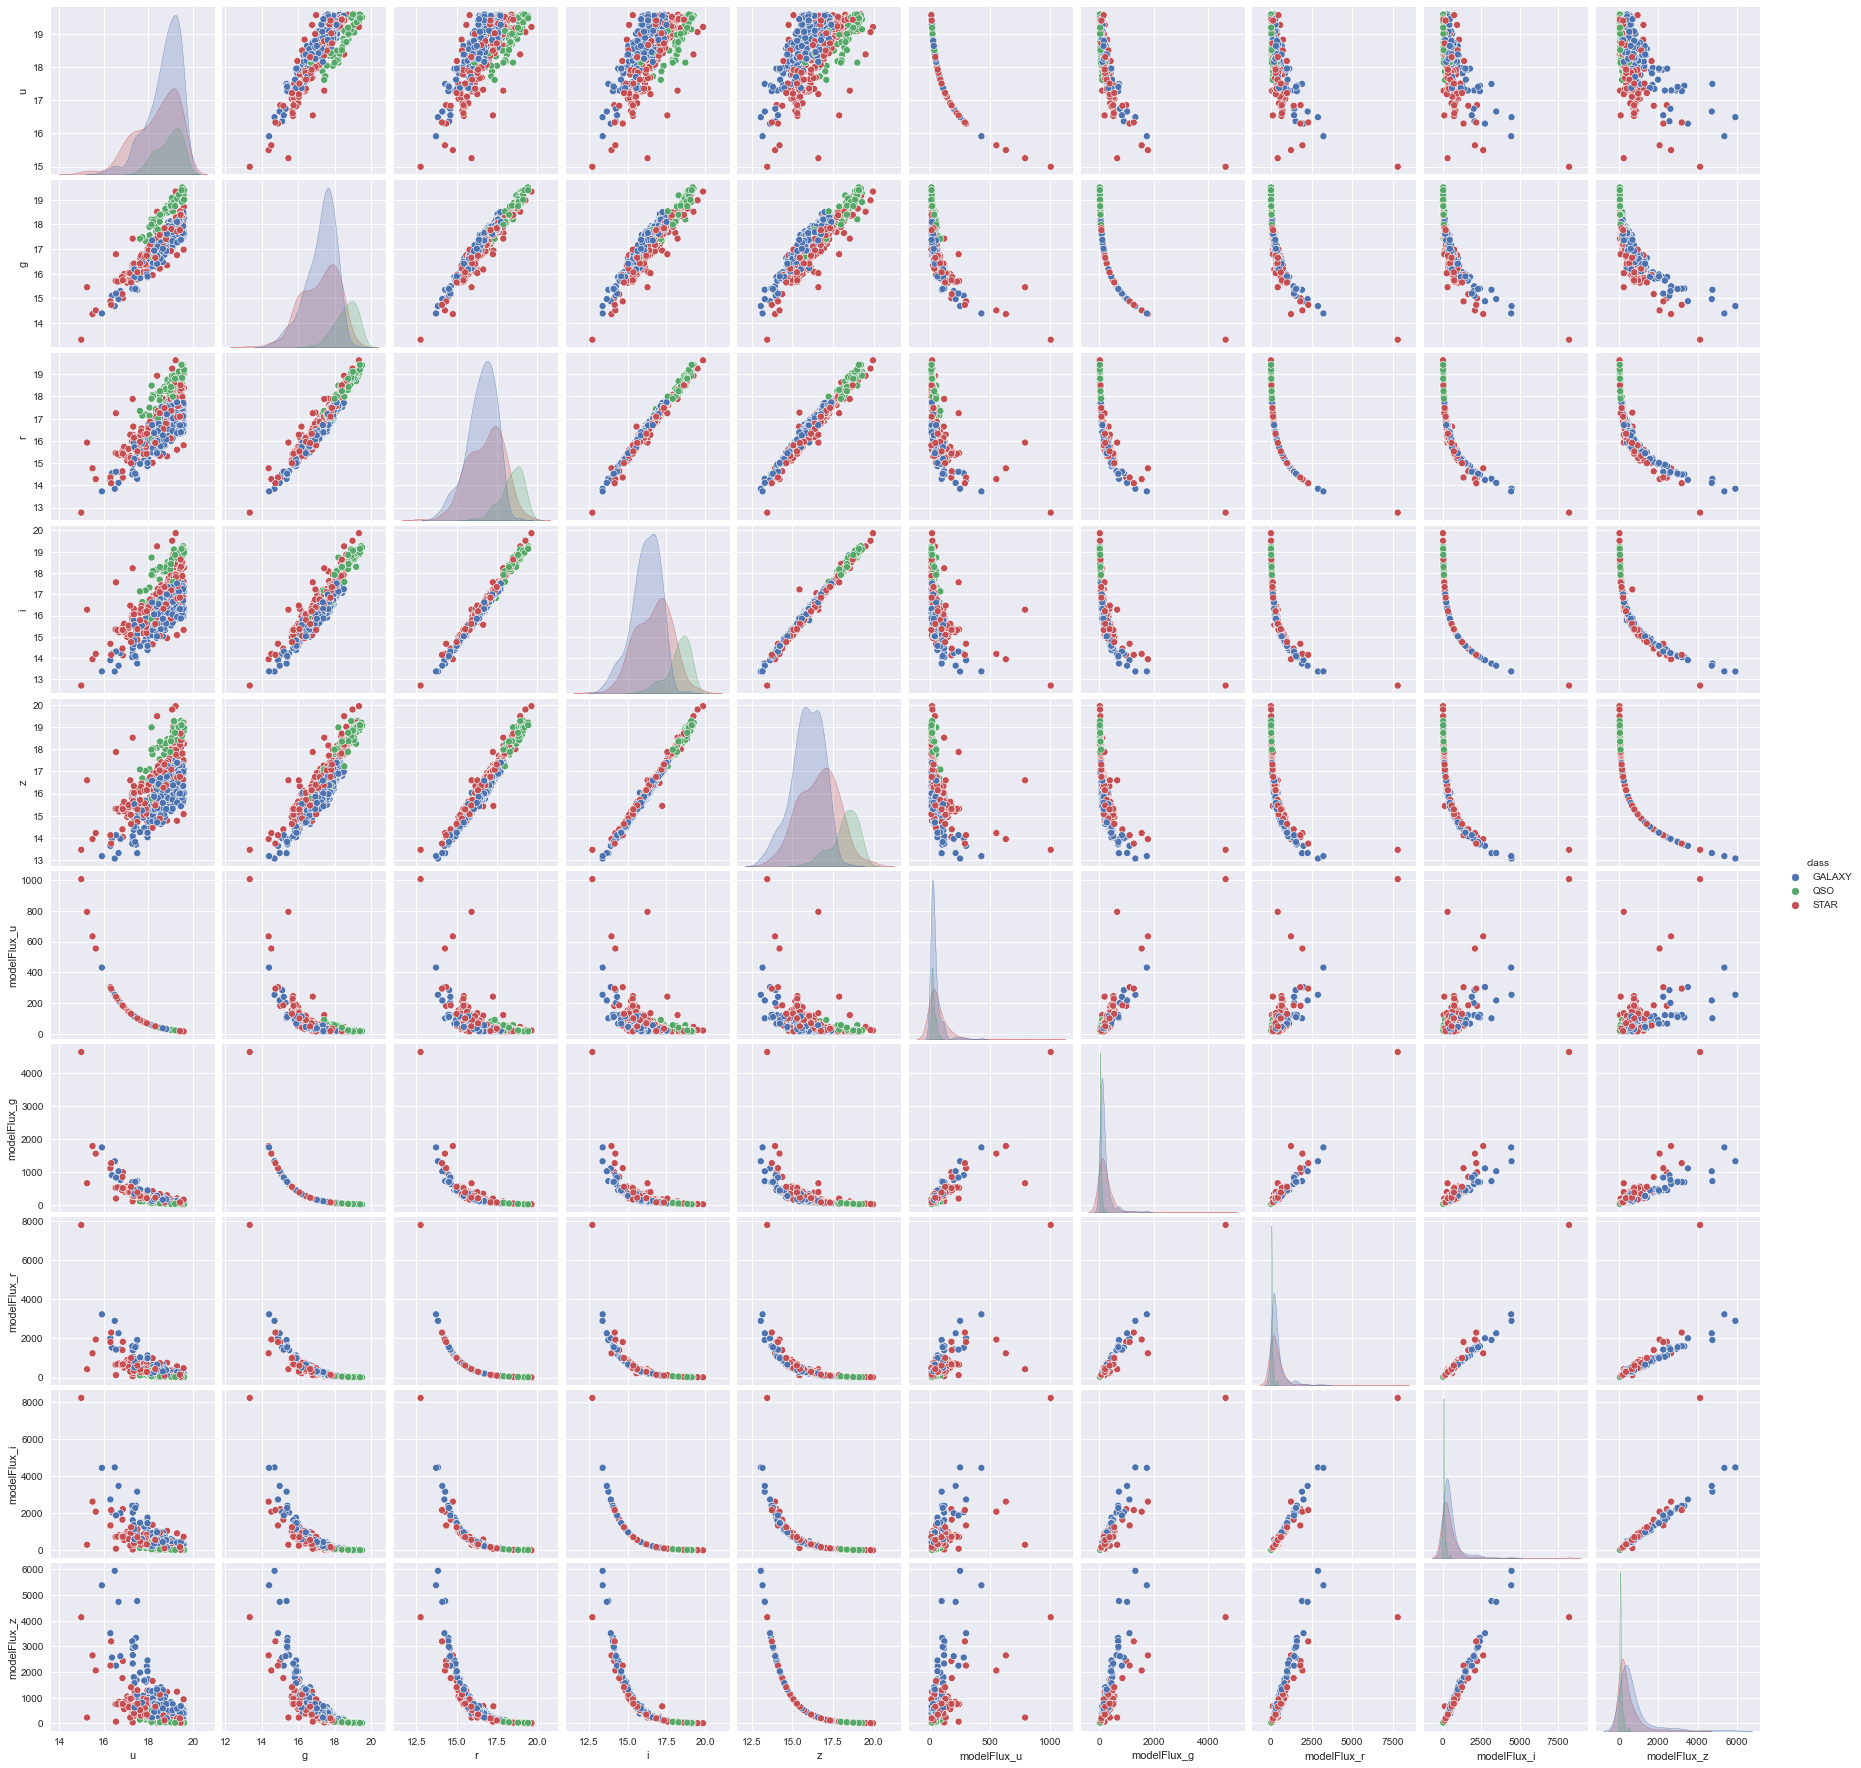

In [56]:
plt.figure(figsize = (15,7))
#pairplot of class with electromagnetic spectrum data
sns.pairplot(sampleData[['class', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z']], hue='class')

<Figure size 1080x504 with 0 Axes>

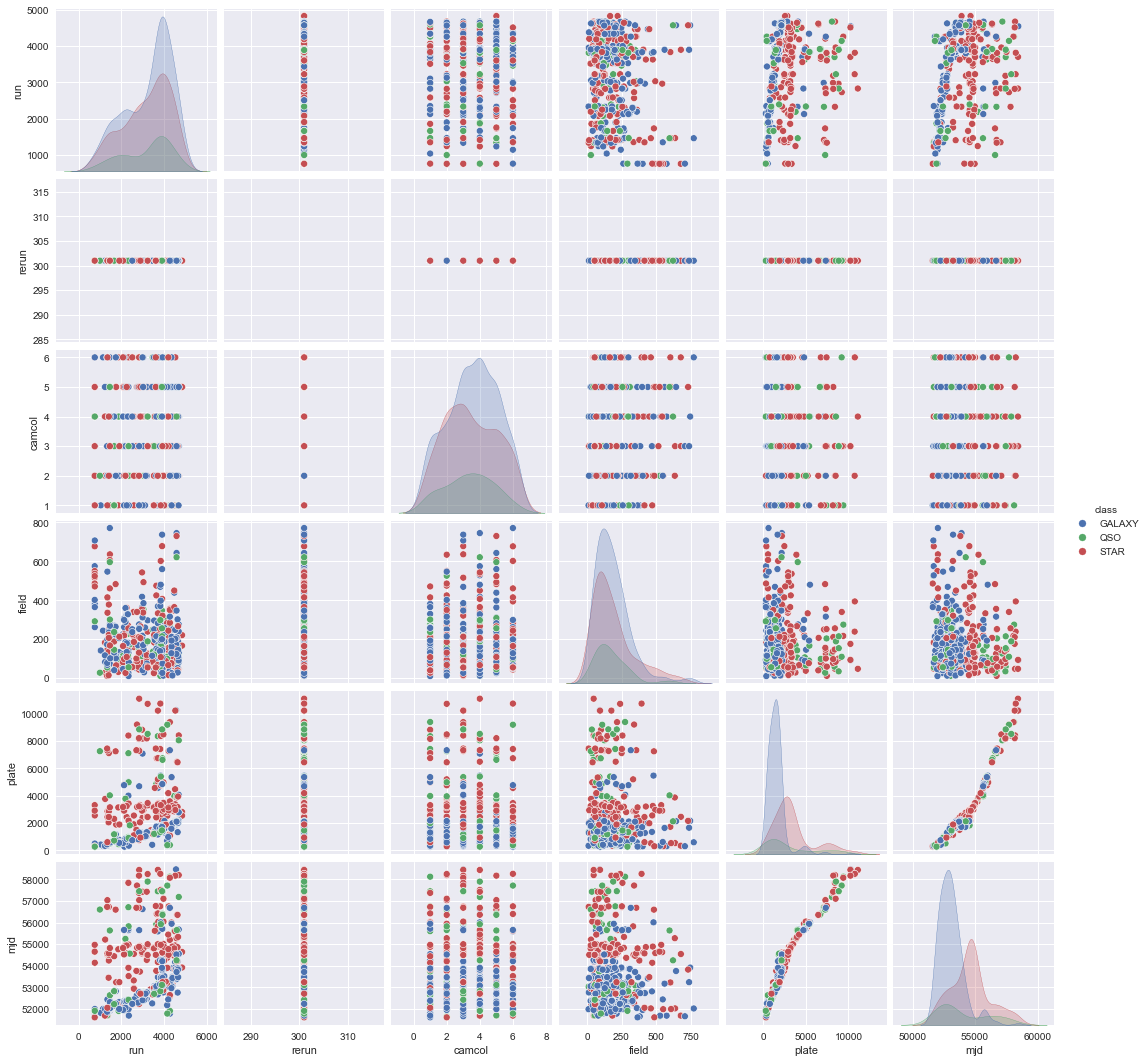

In [57]:
plt.figure(figsize = (15,7))
#pairplot of class with photometric data
sns.pairplot(sampleData[['class', 'run', 'rerun', 'camcol', 'field', 'plate', 'mjd']], hue='class')

## Feature Engineering

In [58]:
# Colour Indexes-difference between the two spectrum range
spaceObjData['color_u_g'] = spaceObjData['u'] - spaceObjData['g']
spaceObjData['color_g_r'] = spaceObjData['g'] - spaceObjData['r']
spaceObjData['color_r_i'] = spaceObjData['r'] - spaceObjData['i']
spaceObjData['color_i_z'] = spaceObjData['i'] - spaceObjData['z']

In [59]:
spaceObjData[['u', 'g', 'r', 'i', 'z', 'color_u_g', 'color_g_r', 'color_r_i', 'color_i_z']].head()

,u,g,r,i,z,color_u_g,color_g_r,color_r_i,color_i_z
objid,,,,,,,,,
1237645879551066262,19.38905,18.24496,17.58728,17.20807,16.90905,1.14409,0.65768,0.37921,0.29902
1237645879578460255,19.52808,17.96541,17.03493,16.53754,16.14154,1.56267,0.93048,0.49739,0.39600
1237645879578460271,18.72268,17.38520,16.81134,16.51803,16.29502,1.33748,0.57386,0.29331,0.22301
1237645941291614227,17.65612,16.17133,15.58940,15.37850,15.26744,1.48479,0.58193,0.21090,0.11106
1237645941824356443,17.54884,15.75164,15.03100,14.66728,14.36099,1.79720,0.72064,0.36372,0.30629


In [60]:
# conversions because the range of flux features are too wide
# 1 nanomaggies = 3.631 * 10^-6 Jansky ==> Jansky is a non-SI unit of spectral flux density
# 1js = 10^-26 W*m^-2*Hz^-1

cols = spaceObjData.iloc[:, 11:16]
for i in cols:
    spaceObjData[i] = spaceObjData[i] * 3.631*(10**-6)

spaceObjData.iloc[:, 11:16].describe()

,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,0.000225,0.000760,0.001367,0.001796,0.002074
std,0.010872,0.007132,0.009916,0.013371,0.018469
min,0.000052,0.000036,-0.001005,-0.001024,-0.004337
25%,0.000071,0.000217,0.000336,0.000421,0.000467
50%,0.000102,0.000353,0.000622,0.000816,0.000959
75%,0.000186,0.000652,0.001192,0.001616,0.002021
max,7.228239,3.743067,1.514870,3.156607,9.242554


In [61]:
# log transformation to decrease the effect of the outliers
spaceObjData['logRedshift'] = (spaceObjData['redshift']+1).transform(np.log)

In [62]:
# Encode target
objects = {"STAR": 0, "GALAXY": 1, "QSO": 2}
spaceObjData['class'] = spaceObjData['class'].map(objects)

In [63]:
spaceObjData.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,...,modelFlux_z,redshift,plate,mjd,class,color_u_g,color_g_r,color_r_i,color_i_z,logRedshift
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,184.883287,26.993610,18.642071,17.416536,16.891576,16.593550,16.394705,3161.838304,301.0,3.493276,...,0.002074,0.172462,2227.048788,53623.901124,0.753592,1.225536,0.524959,0.298027,0.198845,0.119760
std,69.327689,20.892019,0.829097,0.984960,1.132459,20.067806,28.357076,1090.979194,0.0,1.593426,...,0.018469,0.433437,2054.014340,1477.028289,0.631205,0.528009,0.340319,20.032242,28.328127,0.245661
min,0.002795,-11.252825,6.752484,7.466997,8.449127,-9999.000000,-9999.000000,94.000000,301.0,1.000000,...,-0.004337,-0.004268,266.000000,51578.000000,0.000000,-6.963016,-14.784580,-15.859360,-10013.264930,-0.004277
25%,146.617060,7.229103,18.224177,16.863850,16.209238,15.878837,15.636038,2305.000000,301.0,2.000000,...,0.000467,0.000037,954.000000,52577.000000,0.000000,0.974920,0.324710,0.146200,0.050660,0.000037
50%,186.532990,29.631464,18.873805,17.531045,16.916115,16.620505,16.445845,3530.000000,301.0,4.000000,...,0.000959,0.051079,1676.000000,53228.000000,1.000000,1.233790,0.535990,0.286490,0.158350,0.049817
75%,225.418842,43.801855,19.271110,18.060380,17.585532,17.338830,17.225795,3927.000000,301.0,5.000000,...,0.002021,0.097835,2558.000000,54509.000000,1.000000,1.572440,0.763410,0.399073,0.283190,0.093340
max,359.998882,79.742295,19.600000,19.996050,33.209920,32.349170,30.846780,4858.000000,301.0,6.000000,...,9.242554,7.011245,11704.000000,58543.000000,2.000000,6.060500,5.553990,10016.920000,10016.604430,2.080846


In [64]:
# Reorder columns
spaceObjData=spaceObjData[['class', 'u', 'g', 'r', 'i', 'z',
        'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z',
        'color_u_g', 'color_g_r', 'color_r_i','color_i_z', 
        'logRedshift','ra', 'dec', 'redshift','redshift_class',
        'rerun', 'camcol', 'field','plate', 'mjd']]
spaceObjData.head()

,class,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,...,logRedshift,ra,dec,redshift,redshift_class,rerun,camcol,field,plate,mjd
objid,,,,,,,,,,,,,,,,,,,,,
1237645879551066262,1,19.38905,18.24496,17.58728,17.20807,16.90905,0.000064,0.000183,0.000335,0.000475,...,0.031619,348.902530,1.271886,0.032125,True,301,6,94,382,51816
1237645879578460255,1,19.52808,17.96541,17.03493,16.53754,16.14154,0.000056,0.000237,0.000557,0.000881,...,0.114502,51.443695,1.270073,0.121315,True,301,6,512,414,51869
1237645879578460271,1,18.72268,17.38520,16.81134,16.51803,16.29502,0.000118,0.000404,0.000685,0.000897,...,0.047613,51.483584,1.272013,0.048765,True,301,6,512,414,51869
1237645941291614227,0,17.65612,16.17133,15.58940,15.37850,15.26744,0.000314,0.001235,0.002110,0.002562,...,-0.000098,49.627485,-1.041769,-0.000098,False,301,1,100,1515,52932
1237645941824356443,1,17.54884,15.75164,15.03100,14.66728,14.36099,0.000347,0.001817,0.003529,0.004933,...,0.039496,40.285690,-0.714957,0.040287,True,301,2,37,408,51821


## Training

In [65]:
# Basic validation: splitting the data 60 - 20 - 20 train/val/test
# Utilize holdout data at the end for the most efficient algorithm

X_tr, X_holdout, y_tr, y_holdout = train_test_split(spaceObjData.iloc[:, 1:18], spaceObjData.loc[:, 'class'], test_size=0.2,random_state=76)
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=.25, random_state=76)

X_train.shape # shape of train data

(300000, 17)

In [66]:
X_test.shape # shape of test data

(100000, 17)

In [67]:
X_holdout.shape  # shape of holdout data

(100000, 17)

In [68]:
#this function takes confusion matrix as input and plots heatmap of that confusion matrix
def plotConfusionMatrixDF(cnf):
    cnfDf = pd.DataFrame(cnf, index=['Galaxy','Star','Quasar'], columns=['Galaxy','Star','Quasar'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cnfDf, annot=True, fmt='')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [69]:
#creating a new dataframe comparisionData which consists of Test Accuracy, precision, recall and F1 score of the Machine learning models
comparisonColumns = ['Model','Testing Accuracy','Precision','Recall','F1 Score']
comparisonData = []
#this function takes a list of data that is to be added into comparision dataframe
def createComparisonTable(dataList):
    comparisonData.append(dataList)

In [70]:
#This functions takes input as model, train data and returns predicted value of dependent variable
def model(model, modelName, X_train, y_train, addToTable=True):
    #fitting the model using training data
    model.fit(X_train,y_train)
    #we are predicting the class (Galaxy, Star or Quasar) of the data
    classPrediction = model.predict(X_test)
    #test Accuracy, Precision, recall, f1score are calculated and added to the table if addToTable is true
    testAccuracy = round(accuracy_score(y_test,classPrediction)*100,2)
    precision, recall, f1score, support = score(y_test, classPrediction, average='macro')
    if addToTable:
        createComparisonTable([modelName,testAccuracy,precision,recall,f1score]) 
    return classPrediction

## Logistic Regression

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


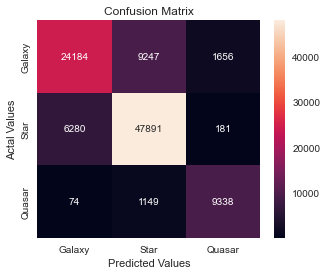

In [71]:
logisticRegression = LogisticRegression()
#calling model function to get predicted class values for LogisticRegression model
classPredictionLr=model(logisticRegression, 'Logistic Regression', X_train, y_train)
lrConfusionMatrix = confusion_matrix(y_test,classPredictionLr)
plotConfusionMatrixDF(lrConfusionMatrix)

## Naive Bayes

### GaussianNB 


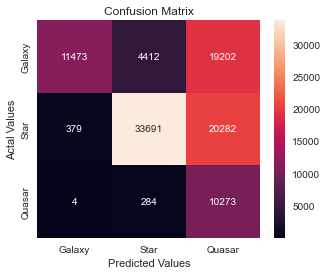

In [72]:
gaussianNB = GaussianNB()
#calling model function to get predicted class values for GaussianNB model
gnbPrediction=model(gaussianNB, 'GaussianNB', X_train, y_train)
gnbConfusionMatrix = confusion_matrix(y_test,gnbPrediction)
plotConfusionMatrixDF(gnbConfusionMatrix)

### Bernoulli NB

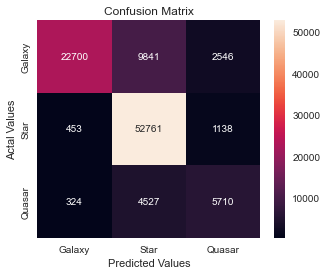

In [73]:
bernoulliNB = BernoulliNB()
#calling model function to get predicted class values for BernoulliNB model
bnbPrediction=model(bernoulliNB, 'BernoulliNB', X_train, y_train)
bnbConfusionMatrix = confusion_matrix(y_test,bnbPrediction)
plotConfusionMatrixDF(bnbConfusionMatrix)

## Linear SVC

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


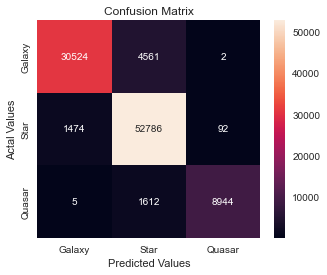

In [74]:
linearSVC = LinearSVC()
#calling model function to get predicted class values for Linear SVC model
classPredictionSVC=model(linearSVC, 'Linear SVC', X_train, y_train)
svcConfusionMatrix = confusion_matrix(y_test,classPredictionSVC)
plotConfusionMatrixDF(svcConfusionMatrix)

## Decision Tree

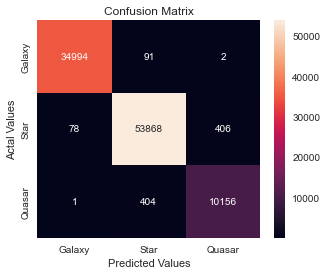

In [75]:
dtree = DecisionTreeClassifier()
#calling model function to get predicted class values for Decision Tree model
classPredictionTree=model(dtree, 'Decision Tree', X_train, y_train)
dtreeConfusionMatrix = confusion_matrix(y_test,classPredictionTree)
plotConfusionMatrixDF(dtreeConfusionMatrix)

In [76]:
# View feature importances
importances_dt = pd.DataFrame({'feature': X_train.columns,
                             'importance': dtree.feature_importances_})
importances_dt = importances_dt.sort_values('importance',ascending=False).set_index('feature')
importances_dt.head(17)

,importance
feature,
logRedshift,0.959929
color_u_g,0.013042
color_g_r,0.008802
color_r_i,0.005988
color_i_z,0.002651
dec,0.001624
ra,0.001369
modelFlux_z,0.001056
u,0.000915


## KNN

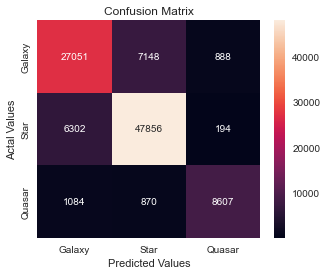

In [77]:
knn=KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', n_jobs=-1)
#calling model function to get predicted class values for KNN model
knnPrediction=model(knn, 'KNN', X_train, y_train)
knnConfusionMatrix = confusion_matrix(y_test,knnPrediction)
plotConfusionMatrixDF(knnConfusionMatrix)

## Bagging Algorithms

### Bagging Classifier

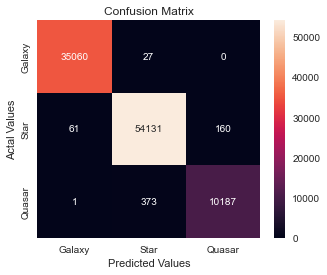

In [78]:
baggingClassifier = BaggingClassifier(base_estimator=dtree, n_estimators=30,bootstrap=True, n_jobs=-1)
#calling model function to get predicted class values for Bagging Classifier using DTree model
bagginClassifierPrediction=model(baggingClassifier, 'Bagging Classifier', X_train, y_train)
bagConfusionMatrix = confusion_matrix(y_test,bagginClassifierPrediction)
plotConfusionMatrixDF(bagConfusionMatrix)

### Random Forest Classifier 

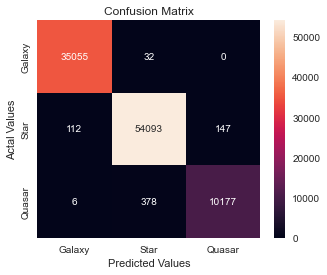

In [79]:
randomForestClassifier = RandomForestClassifier(n_estimators=50, n_jobs=-1)
#calling model function to get predicted class values for RandomForestClassifier model
randomForestPrediction=model(randomForestClassifier, 'Random Forest Classifier', X_train, y_train)
randomForestConfusionMatrix = confusion_matrix(y_test,randomForestPrediction)
plotConfusionMatrixDF(randomForestConfusionMatrix)

In [80]:
# View feature importances
importances_rf = pd.DataFrame({'feature': X_train.columns,
                             'importance': randomForestClassifier.feature_importances_})
importances_rf = importances_rf.sort_values('importance',ascending=False).set_index('feature')
importances_rf.head(17)

,importance
feature,
logRedshift,0.459082
color_r_i,0.155769
color_i_z,0.108393
color_u_g,0.096171
color_g_r,0.039459
i,0.027713
modelFlux_i,0.022404
r,0.020739
g,0.016684


## Boosting Algorithms 

### AdaBoost Classifier

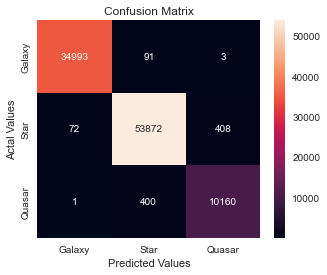

In [100]:
adaBoostclassifier = AdaBoostClassifier(base_estimator=dtree, n_estimators=30, random_state = 7)
#calling model function to get predicted class values for AdaBoost Classifier model
adaBoostPrediction=model(adaBoostclassifier, 'Ada Boost Classifier', X_train, y_train)
adaBoostConfusionMatrix = confusion_matrix(y_test,adaBoostPrediction)
plotConfusionMatrixDF(adaBoostConfusionMatrix)

### Stochastic Gradient Boosting

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


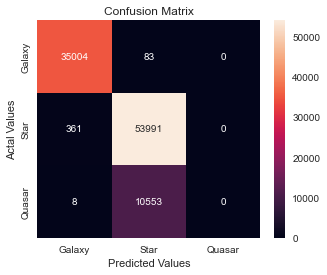

In [102]:
gradientBoostClassifier = GradientBoostingClassifier(n_estimators=30, learning_rate=0.01, random_state=7)
#calling model function to get predicted class values for Stochastic Gradient Boosting model
gradientBoostPrediction=model(gradientBoostClassifier, 'Stochastic Gradient Boosting', X_train, y_train)
gradientBoostConfusionMatrix = confusion_matrix(y_test,gradientBoostPrediction)
plotConfusionMatrixDF(gradientBoostConfusionMatrix)

# Classifier Comparison

In [83]:
#this dataframe consists of a table contains data related to accuracy, precision, recall and F1 Score for each model 
comparisonDF = pd.DataFrame(comparisonData,columns=comparisonColumns)

In [84]:
#sorting the Dataframe by test accuracy
comparisonDF.sort_values('Testing Accuracy',inplace=True)
comparisonDF.reset_index(inplace=True)
comparisonDF.drop(columns=['index'],inplace=True)

In [85]:
comparisonDF

,Model,Testing Accuracy,Precision,Recall,F1 Score
0,GaussianNB,55.44,0.683942,0.639861,0.518670
1,BernoulliNB,81.17,0.786901,0.719453,0.738713
2,Logistic Regression,81.41,0.816396,0.818194,0.815534
3,KNN,83.51,0.843449,0.822144,0.832192
4,Linear SVC,92.25,0.946228,0.896010,0.918114
5,Stochastic Gradient Boosting,98.72,0.986771,0.973969,0.980132
6,Decision Tree,99.02,0.983340,0.983365,0.983353
7,Ada Boost Classifier,99.02,0.983335,0.983507,0.983421
8,Random Forest Classifier,99.32,0.991628,0.985988,0.988765
9,Bagging Classifier,99.38,0.991812,0.986584,0.989163


#### Observation

The accuracy of categorization, rather than minimizing False Negatives, is the most relevant information in this dataset. As a result, we can observe that Random Forest Classifier and Bagging Classifier perform the best based on the table obtained after all algorithms ran their predictions.

[Text(0, 0, 'GaussianNB'),
 Text(1, 0, 'BernoulliNB'),
 Text(2, 0, 'Logistic Regression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'Linear SVC'),
 Text(5, 0, 'Stochastic Gradient Boosting'),
 Text(6, 0, 'Decision Tree'),
 Text(7, 0, 'Ada Boost Classifier'),
 Text(8, 0, 'Random Forest Classifier'),
 Text(9, 0, 'Bagging Classifier')]

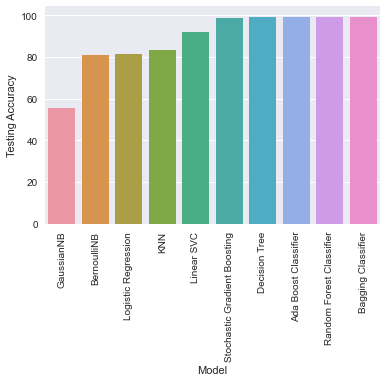

In [86]:
#bar plot of model and testing accuracy
ax = sns.barplot(x="Model", y="Testing Accuracy", data=comparisonDF)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

[Text(0, 0, 'GaussianNB'),
 Text(1, 0, 'BernoulliNB'),
 Text(2, 0, 'Logistic Regression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'Linear SVC'),
 Text(5, 0, 'Stochastic Gradient Boosting'),
 Text(6, 0, 'Decision Tree'),
 Text(7, 0, 'Ada Boost Classifier'),
 Text(8, 0, 'Random Forest Classifier'),
 Text(9, 0, 'Bagging Classifier')]

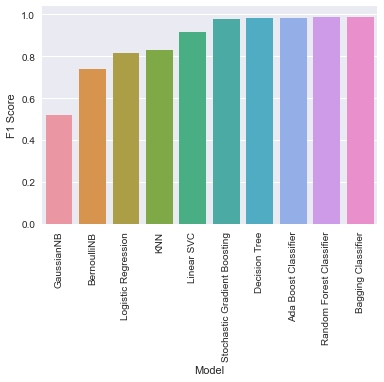

In [87]:
#barplot of model and F1 score
ax = sns.barplot(x="Model", y="F1 Score", data=comparisonDF)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

## ROC Curve

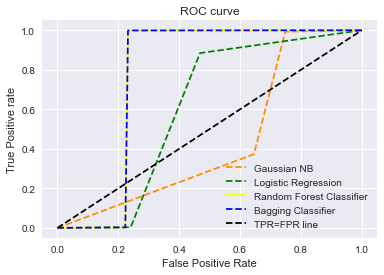

In [88]:
#computing false positive rates, true positive rates and threshold for bottom two and top two models test accuracy models
#false positive rate, true positive rate, threshold of gaussian NB model
fpr_gnb, tpr_gnb, thresh_gnb = roc_curve(y_test, gnbPrediction, pos_label=1)
#false positive rate, true positive rate, threshold of Logistic Regression model
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, classPredictionLr, pos_label=1)
#false positive rate, true positive rate, threshold of Bagging Classifier with DTree as base tree model
fpr_bc, tpr_bc, thresh_bc = roc_curve(y_test, bagginClassifierPrediction, pos_label=1)
#false positive rate, true positive rate, threshold of Random Forest CLassifier model
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, randomForestPrediction, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
#calculating false positive rates, true positive rates of ideal line (line where tpr=fpr)
i_fpr, i_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr_gnb, tpr_gnb, linestyle='--',color='darkorange', label='Gaussian NB')
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf,color='yellow', label='Random Forest Classifier')
plt.plot(fpr_bc, tpr_bc, linestyle='--',color='blue', label='Bagging Classifier')
plt.plot(i_fpr, i_tpr, linestyle='--', color='black', label='TPR=FPR line')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

#### Observation

From the ROC curve we can conclude that Gaussian NB, Logistic Regression models are not good models because the threshold score of True Positive rate is not closer to 1 and threshold score of Negative rate is high, Bagging Classifier and Random Forest Classifier models are good because the threshold score of True Positive rate is closer to 1 and threshold score of Negative rate is low.

## Hyperparameter Tuning

In [89]:
#comparision table to hold testing accuracy, precision, recall, F1 Score for the top 2 and bottom 2 base models and hyperparameters
#tuned models
comparisonColumnsTuning = ['Model','Testing Accuracy','Precision','Recall','F1 Score']
comparisonColumnsTuningData = []

### Tuning Gaussian NB

In [90]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=2.848035868435799e-08)


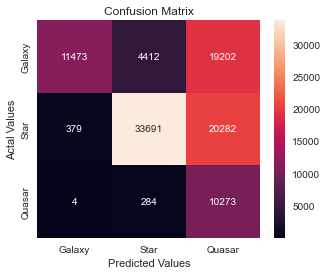

In [91]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
#tuned Gaussian NB model using Grid Search
tunedGaussianNBPrediction = model(nbModel_grid, "Tuned GaussianNB", X_train, y_train, False)
print(nbModel_grid.best_estimator_)
gnbConfusionMatrix = confusion_matrix(y_test,gnbPrediction)
plotConfusionMatrixDF(gnbConfusionMatrix)

In [92]:
testAccuracy = round(accuracy_score(y_test,tunedGaussianNBPrediction)*100,2)
precision, recall, f1score, support = score(y_test, tunedGaussianNBPrediction, average='macro')

In [93]:
#adding the accuracy, precision, recall, f1scores of the base Gaussian NB model and Tuned Gaussian NB model
comparisonColumnsTuningData.append(comparisonDF[comparisonDF['Model']=='GaussianNB'].values.flatten().tolist())
comparisonColumnsTuningData.append(["Tuned GaussianNB",testAccuracy,precision,recall,f1score])

### Tuning Bagging Classifier

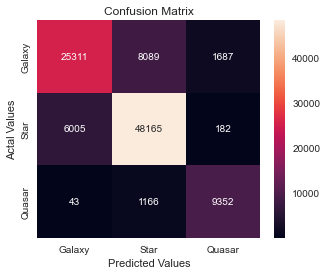

In [94]:
#tuning bagging classifier by changing base estimator as logisticRegression, base model has base estomator DTree
tunedBaggingClassifier= BaggingClassifier(base_estimator=logisticRegression, n_estimators=100,bootstrap=True, n_jobs=-1, random_state=7)
tunedClassPredictionBag = model(tunedBaggingClassifier,"Tuned Bagging Classifier",X_train, y_train, False)
bagClassConfusionMatrix = confusion_matrix(y_test,tunedClassPredictionBag)
plotConfusionMatrixDF(bagClassConfusionMatrix)

In [95]:
testAccuracy = round(accuracy_score(y_test,tunedClassPredictionBag)*100,2)
precision, recall, f1score, support = score(y_test, tunedClassPredictionBag, average='macro')

In [96]:
#adding the accuracy, precision, recall, f1scores of the base Bagging classifier model and Tuned Bagging Classifier model
comparisonColumnsTuningData.append(comparisonDF[comparisonDF['Model']=='Bagging Classifier'].values.flatten().tolist())
comparisonColumnsTuningData.append(["Tuned Bagging Classifier",testAccuracy,precision,recall,f1score])

In [97]:
tuningDf = pd.DataFrame(comparisonColumnsTuningData,columns=comparisonColumnsTuning)
tuningDf

,Model,Testing Accuracy,Precision,Recall,F1 Score
0,GaussianNB,55.44,0.683942,0.639861,0.518670
1,Tuned GaussianNB,58.37,0.659034,0.660637,0.541891
2,Bagging Classifier,99.38,0.991812,0.986584,0.989163
3,Tuned Bagging Classifier,82.83,0.826464,0.831023,0.827462


#### Observation

On the two algorithms that performed the worst and best, we tried tuning the hyperparameters. As can be seen, the accuracy of algorithm that performed poorly in their original form has improved. Bagging algorithm is tuned by changing base estimator to logistic regression from Decision Tree and in result it is slightly decreased compared to its base version.

## Holdout Data Test

In [98]:
#fitting the model using best accurate model which is bagging classifier on holdout data
baggingClassifier.fit(X_train,y_train)
holdoutClassPrediction = baggingClassifier.predict(X_holdout)    
testAccuracy = round(accuracy_score(y_holdout,holdoutClassPrediction)*100,2)
precision, recall, f1score, support = score(y_holdout, holdoutClassPrediction, average='macro')
holdoutYScore = baggingClassifier.predict_proba(X_holdout)
# Use X_holdout, y_holdout to calculate accuracy
holdoutAacc = round(accuracy_score(y_holdout, holdoutClassPrediction) * 100, 2)
print(f'Accuracy of Bagging Classifier Decision Tree on holdout: % {holdoutAacc}')

Accuracy of Bagging Classifier Decision Tree on holdout: % 99.42


## Final Conclusion

The best results that we got came from ensemble models, which reduce variance and improve performance over their constituent learning models. Gaussian NB model had relatively smaller accuracy value, Bagging Classifier with Decision Trees model had relatively larger accuracy value in this dataset.